# Decision Tree Practice
## Pima Indians Diabetes Database
### Variables description
* Pregnancies: Number of times pregnant
* Glucose(葡萄糖): Plasma glucose concentration a 2 hours in an oral glucose tolerance testc
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin(胰島素): 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction
* Age 
* Outcome

### import package

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus

# Data Preprocessing
### read data
[data source link](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Drop relatively useless attributes¶

In [3]:
df = df.drop('Pregnancies', axis = 1)
df = df.drop('SkinThickness', axis = 1)
df = df.drop('DiabetesPedigreeFunction', axis = 1)

## Partitioned age by 40 

In [4]:
df.loc[df['Age'] < 40, ['Age']] = 0
df.loc[df['Age'] >= 40, ['Age']] = 1
df.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,72,0,33.6,1,1
1,85,66,0,26.6,0,0
2,183,64,0,23.3,0,1
3,89,66,94,28.1,0,0
4,137,40,168,43.1,0,1


## Partitioned BloodPressure by 120
### Defintion of high blood pressure
1. STAGE 1 or Prehypertension is 120/80 to 139/89
2. STAGE 2 or Mild Hypertension is 140/90 to 159/99
3. STAGE 3 or Moderate Hypertension is 160/100 to 179/109
4. STAGE 4 or Severe Hypertension is 180/110 or higher
* [Reference](https://vascularcures.org/high-blood-pressure-and-vascular-disease/)

In [5]:
df.loc[df['BloodPressure'] < 120, ['BloodPressure']] = 0
df.loc[df['BloodPressure'] >= 120, ['BloodPressure']] = 1
df.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,0,0,33.6,1,1
1,85,0,0,26.6,0,0
2,183,0,0,23.3,0,1
3,89,0,94,28.1,0,0
4,137,0,168,43.1,0,1


## Partitioned Glucose by 130
* 日本糖尿病學會的診斷標準，血糖的正常值為飯前100 mg/dl以下，飯後一小時160 mg/dl、飯後二小時120 mg/dl以下。若飯前的含量為 140 mg/dl以上，二小時的含量高達 200 mg/dl以上，則可診斷為罹患糖尿病

In [6]:
df.loc[df['Glucose'] < 130, ['Glucose']] = 0
df.loc[df['Glucose'] >= 130, ['Glucose']] = 1
df.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,1,0,0,33.6,1,1
1,0,0,0,26.6,0,0
2,1,0,0,23.3,0,1
3,0,0,94,28.1,0,0
4,1,0,168,43.1,0,1


## Partioned BMI by 24
* 過重：24 ≦ BMI ＜ 27
* 輕度肥胖：27 ≦ BMI ＜ 30
* 中度肥胖：30 ≦ BMI ＜35
* 重度肥胖：BMI ≧35

In [7]:
df.loc[df['BMI'] < 24, ['BMI']] = 0
df.loc[df['BMI'] >= 24, ['BMI']] = 1
df.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,1,0,0,1.0,1,1
1,0,0,0,1.0,0,0
2,1,0,0,0.0,0,1
3,0,0,94,1.0,0,0
4,1,0,168,1.0,0,1


## Seperate data into training set and testing set

In [8]:
df_train = df[:200]
df_train.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,1,0,0,1.0,1,1
1,0,0,0,1.0,0,0
2,1,0,0,0.0,0,1
3,0,0,94,1.0,0,0
4,1,0,168,1.0,0,1


In [9]:
df_test = df[200:]
df_test.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
200,0,0,0,1.0,0,0
201,1,0,0,1.0,0,0
202,0,0,0,1.0,0,0
203,0,0,44,0.0,0,0
204,0,0,190,1.0,1,0


## Seperate attribute and answer

In [10]:
y = df_train['Outcome'].values
df_train = df_train.drop('Outcome', 1)

y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1])

## Build decision tree

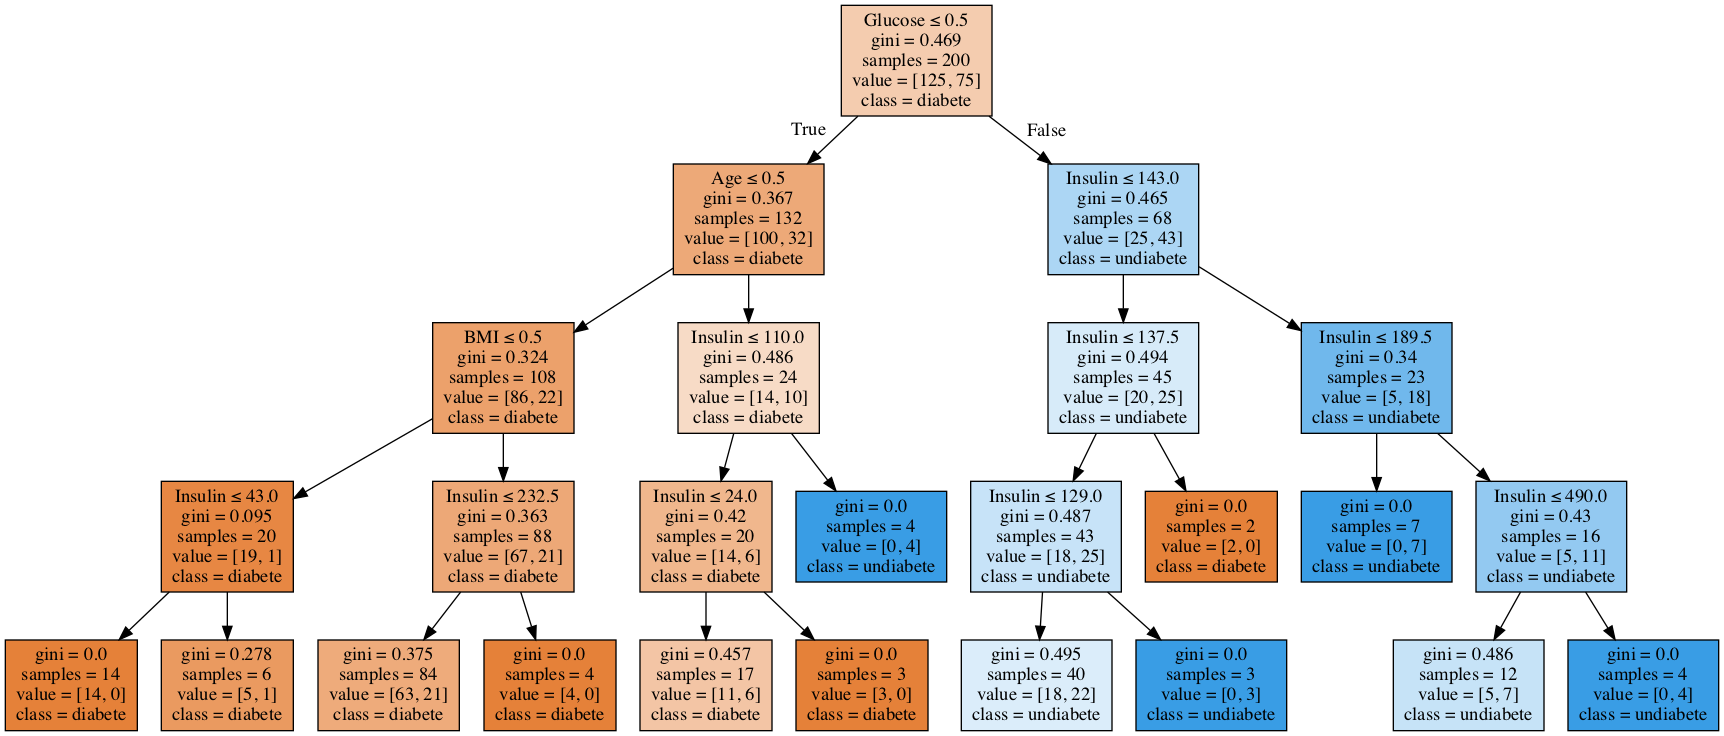

In [11]:
from IPython.display import Image  
dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(df_train,y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(df_train),
                class_names=['diabete','undiabete'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")
Image(graph.create_png())  

In [12]:
dtree.feature_importances_

array([0.50201791, 0.        , 0.38980195, 0.04266146, 0.06551869])

# Apply to testing data and the calculate the accuracy

In [13]:
y_test = df_test['Outcome'].values
X_test = df_test.drop('Outcome', 1)

y_predict = dtree.predict(X_test)

y_predict

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7482394366197183

# Report
* 根據自己的設立的條件所建立出來的決策樹，Accuracy 並未特別比有設立條件的精準，另外像是測量高血壓是否會影響引發糖尿病，因為此資料集的所有測試人其血壓值都在正常範圍，故並不影響糖尿病的判斷